In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [2]:
# Files to Load 
cityDataCSV = "data/city_data.csv"
rideDataCSV = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
dfCity = pd.read_csv(cityDataCSV)
dfRide = pd.read_csv(rideDataCSV)

In [4]:
dfCity.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
dfRide.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
dfCity.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
dfRide.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
# Merge two dataframes using a full join
#Should only need a left merge.  Chose full in the event there was a city with no driver data.
dfMerge = pd.merge(dfRide, dfCity, how="outer", on="city")
dfMerge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [9]:
dfMerge.count()
#confirm the total count is 2375.  If greater, there was a city without a record in the driver table.

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [10]:
dfMerge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [11]:
#Come back to this.   
#date = datetime.datetime.strptime(dfMerge["date"], "%d %b %Y  %H:%M:%S.%f")


In [12]:
#dfMerge["dateOnly"] = datetime.datetime.strptime(dfMerge["date"], "%Y %b %d")

#### Part A - Create a dataframe with the data needed.
* Step 1, Create a dataframe with the city, average fare, and total number of rides.
* Step 2, Perfrom a merge to get the city type

In [13]:
dfRide.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [14]:
#Number of Rides By City.
RidesByCity = dfRide["city"].value_counts()
print(RidesByCity)

West Angela             39
South Karenland         38
North Jason             35
Liumouth                33
Port Frank              33
South Phillip           31
South Evanton           31
West Robert             31
South Michelleport      31
New Kimberlyborough     30
North Jasmine           30
Justinberg              30
West Anthony            30
Royland                 30
East Kaylahaven         29
Loganberg               28
Hurleymouth             28
Karenside               28
Richardfort             28
West Heidi              28
Christopherfurt         27
Josephside              27
Carriemouth             27
East Marymouth          27
West Josephberg         26
West Christopherberg    26
Lake Danielberg         26
Joneschester            25
Grahamburgh             25
Lake Robertside         25
                        ..
North Richardhaven      14
Williamsonville         14
Victoriaport            14
North Markport          14
Lake Omar               14
East Kentstad           13
N

In [15]:
dfRideSummary = dfRide.groupby(["city"]).agg({ "fare":'mean',"ride_id":'count'})

In [16]:
#Confirm the counts in my dataframe (dfRideSummary)are the same as the original data (RidesByCity)
#This is an "eyeball" check.   Change to both ascending and descending to compare.
dfRideSummary.sort_values(["ride_id"], ascending=False).head(5)

,fare,ride_id
city,,
West Angela,25.990000,39
South Karenland,26.535526,38
North Jason,22.743714,35
Liumouth,26.150000,33
Port Frank,27.201515,33


In [17]:
#stepA1 is complete
dfRideSummary.head()

,fare,ride_id
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [18]:
#Step A2, Perfrom a merge to get the city type
#this will also bring the unnecessary driver_count column which serves no purpose, but also causes no harm.
dfRideSummaryMerged = pd.merge(dfRideSummary, dfCity, how="left", on=["city", "city"])
dfRideSummaryMerged.head()

,city,fare,ride_id,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [19]:
#Change the labels so they are logical
dfRideSummaryMerged = dfRideSummaryMerged.rename(columns={"fare": "avgFare", 
                                              "ride_id": "totalRides",
                                              "driver_count": "driverCount"
                                             })
dfRideSummaryMerged.head(20)

,city,avgFare,totalRides,driverCount,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


In [20]:
#determine if the datatypes can be used for graphing.  ie, numeric
dfRideSummaryMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
city           120 non-null object
avgFare        120 non-null float64
totalRides     120 non-null int64
driverCount    120 non-null int64
type           120 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ KB


In [21]:
#Step A2 complete
dfRideSummaryMerged.head()

,city,avgFare,totalRides,driverCount,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [74]:
pieColors = ["Gold", "SkyBlue", "Salmon"]

# Pie Charts 1 of 3

###  Total Fares By City Type

In [23]:
#start with the merged data
dfMerge.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [24]:
#Create a dataframe for the values needed in each pie chart
dfFareByCity = dfMerge.groupby("type").agg({"fare":'sum', "ride_id":'count'})


In [25]:
dfFareByCity.head()

,fare,ride_id
type,,
Rural,4327.93,125
Suburban,19356.33,625
Urban,39854.38,1625


In [26]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, .5) #higher the number the more the explosion

In [27]:
dfFareByCity.head(20)

,fare,ride_id
type,,
Rural,4327.93,125
Suburban,19356.33,625
Urban,39854.38,1625


In [28]:
#I need each value, so remove the groupedby, and create a df with just the value, no grouping.
dfFareByCity2 = dfFareByCity.reset_index()
dfFareByCity2.head()

,type,fare,ride_id
0,Rural,4327.93,125
1,Suburban,19356.33,625
2,Urban,39854.38,1625


In [29]:
dfFareByCity2.dtypes

type        object
fare       float64
ride_id      int64
dtype: object

In [30]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1) #higher the number the more the explosion

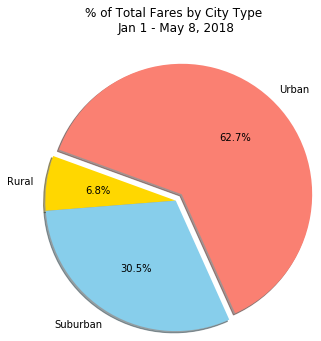

In [83]:
plt.pie(dfFareByCity2["fare"], labels=dfFareByCity2["type"], colors=pieColors,
        autopct="%1.1f%%", explode=explode, shadow=True, startangle=160, radius=1.50)
plt.title("% of Total Fares by City Type \n" + "Jan 1 - May 8, 2018", y=1.25, loc="center")

# Save Figure
#plt.savefig("pie_FaresByCityType.png")
plt.savefig("pie1_FaresByCityType.png", bbox_inches = "tight")

# Pie Charts 2 of 3

###  Total Rides by City Type

In [34]:
#continue with the dataframe from pie chart 1
dfFareByCity2.head()

,type,fare,ride_id
0,Rural,4327.93,125
1,Suburban,19356.33,625
2,Urban,39854.38,1625


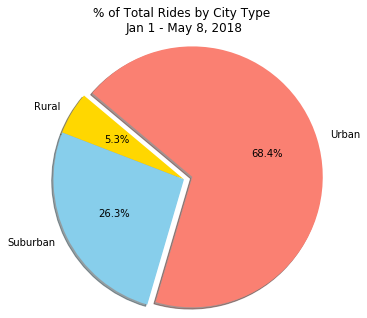

In [91]:
plt.pie(dfFareByCity2["ride_id"], labels=dfFareByCity2["type"], colors=pieColors,
        autopct="%1.1f%%", explode=explode, shadow=True, startangle=140, radius=1.50)

plt.title("% of Total Rides by City Type \n" + "Jan 1 - May 8, 2018", y=1.15, loc="center")

# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

plt.savefig("pie2_RidesByCityType.png", bbox_inches = "tight")

# Pie Charts 3 of 3

###  Total Drivers by City Type

In [36]:
#I have not totaled the drivers.   Begin with the merged df from the Step A.
dfCity.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [37]:
#Create a dataframe for the values needed 
dfDriverByCity = dfCity.groupby("type").agg({"driver_count":'sum'})
dfDriverByCity.head()

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [38]:
#I need each value, so remove the groupedby, and create a df with just the value, no grouping.
dfDriverByCity2 = dfDriverByCity.reset_index()
dfDriverByCity2.head()

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


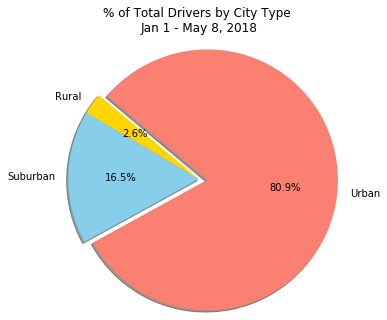

In [92]:
#Create the pie chart

plt.pie(dfDriverByCity2["driver_count"], labels=dfDriverByCity2["type"], colors=colors,
        autopct="%1.1f%%", explode=explode, shadow=True, startangle=140, radius=1.5)

plt.title("% of Total Drivers by City Type \n" + "Jan 1 - May 8, 2018", y=1.15, loc="center")

# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

plt.savefig("pie3_DriversByCityType.png", bbox_inches = "tight")

### Day and Time Analysis

In [40]:
dfDOW = dfMerge
dfDOW.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [41]:
#first convert the string to a datatype
dfDOW["date"] = pd.to_datetime(dfRide["date"])

In [42]:
dfDOW.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

In [43]:
#View the date/time as unique data

dfDOW['new_date'] = [d.date() for d in dfDOW['date']]
dfDOW['new_time'] = [d.time() for d in dfDOW['date']]
dfDOW['day_of_week'] = dfDOW['date'].dt.weekday_name
dfDOW["dayOfWeek"] = dfDOW['date'].apply(lambda time: time.dayofweek)  #returns index DOW, Monday = 0
dfDOW['day_of_week'] = dfDOW['date'].dt.weekday_name   #returns English dOW
dfDOW.head()

,city,date,fare,ride_id,driver_count,type,new_date,new_time,day_of_week,dayOfWeek
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,2018-01-14,10:14:22,Sunday,6
1,Lake Jonathanshire,2018-03-04 18:24:09,31.25,4441251834598,5,Urban,2018-03-04,18:24:09,Sunday,6
2,Lake Jonathanshire,2018-02-24 04:29:00,19.89,2389495660448,5,Urban,2018-02-24,04:29:00,Saturday,5
3,Lake Jonathanshire,2018-02-10 23:22:03,24.28,7796805191168,5,Urban,2018-02-10,23:22:03,Saturday,5
4,Lake Jonathanshire,2018-03-06 04:28:35,13.89,424254840012,5,Urban,2018-03-06,04:28:35,Tuesday,1


In [44]:
dfWeekday = dfDOW.groupby("day_of_week").agg({"fare": 'mean', "ride_id":'count'})
dfWeekday.head()

,fare,ride_id
day_of_week,,
Friday,26.145552,308
Monday,27.618733,363
Saturday,25.069154,319
Sunday,28.135802,324
Thursday,26.825425,341


In [82]:
#obtain the start and end dates to label pie charts

min(dfDOW['date'])

Timestamp('2018-01-01 00:08:16')

In [81]:
max(dfDOW['date'])

Timestamp('2018-05-08 13:10:18')